# K-NN(K Nearest Neighbor)

#### -k最近傍法  
▶ある入力xが与えられたときそのデータに最も近いk個のデータの平均値を予測値とする手法  
▶距離は通常、ユークリッド距離によって測る


##### ユークリッド距離E   
 $$ E = \sqrt{(b_1-a_1)^2 + (b_2-a_2)^2}$$

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

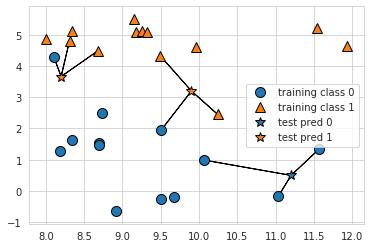

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# Input Data

In [5]:
X, y = mglearn.datasets.make_forge()

In [6]:
print(X.shape)
print(y.shape)

(26, 2)
(26,)


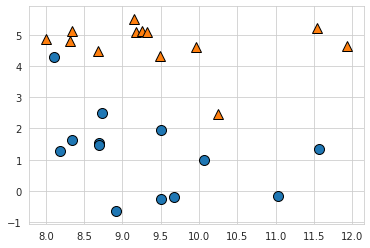

In [7]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

# K-NN Learning

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(19, 2)
(7, 2)


In [10]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
print('predict:'+ str(clf.predict(X_test)))
print('label:'+ str(y_test))

predict:[1 0 1 0 1 0 0]
label:[1 0 1 0 1 1 0]


In [12]:
round(clf.score(X_test, y_test), 3)

0.857

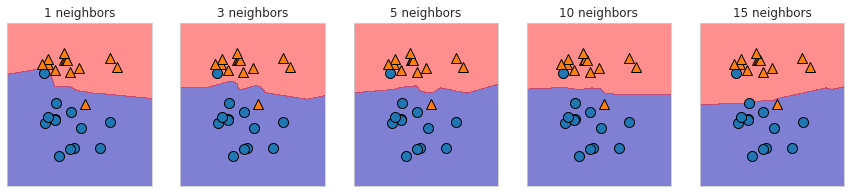

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(15,3))

for n_neighbors,ax in zip([1, 3, 5, 10, 15], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax, alpha=0.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    
plt.show()